- ASSIGNMENT: levenspiel-1
- POINTS: 3
- DUEDATE: 2017-02-02 23:59:59
- CATEGORY: homework
- RUBRIC: default


The exothermic reaction  $A \rightarrow B + C$ was performed in an adiabatic reactor (that means the temperature is not constant, and in this case increases with conversion). The following data was collected. The inlet molar flow was 300 mol A/min.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.array([0, 0.2, 0.4, 0.45, 0.5, 0.6, 0.8, 0.9])
ra = -np.array([1.0, 1.67, 5.0, 5.0, 5.0, 5.0, 1.25, 0.91])  # mol/L/min


# 1. Make a Levenspiel plot



(0, 350)

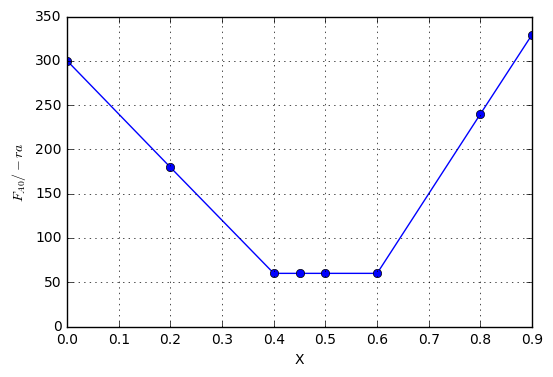

In [2]:
Fa0 = 300  # mol/min
plt.plot(X, Fa0 / -ra, 'bo-')
plt.grid()
plt.xlabel('X')
plt.ylabel('$F_{A0}/-ra$')
plt.ylim([0, 350])


# 2. PFR and CSTR volumes

Using that data, compute the PFR and CSTR volumes required to achieve 40% conversion.


## PFR

For this we need to integrate the area under the curve up to X=0.4. I use indexing to select the part of the curve to integrate. Note a subtle point here: X[0:3] means take a slice of X from index 0 *up to but not including* index 3. 

In [3]:
from scipy.integrate import trapz
Fra = Fa0 / -ra
area = trapz(Fra[0:3], X[0:3])
print('The PFR volume is {:1.2f} L'.format(area))

The PFR volume is 71.93 L


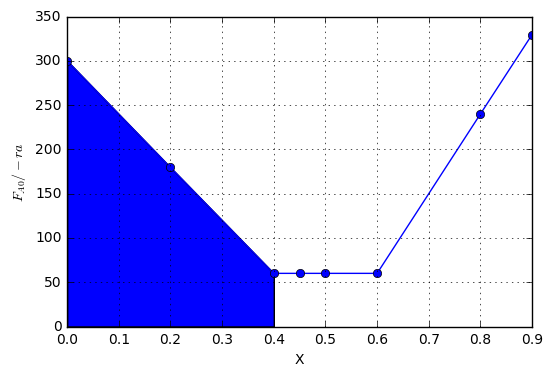

In [4]:
# This is what you integrated above. This area is the volume of the PFR.
# You did not need to show this in your homework, but here is how to do it.
plt.plot(X, Fa0 / -ra, 'bo-')
plt.grid()
plt.xlabel('X')
plt.ylabel('$F_{A0}/-ra$')
plt.ylim([0, 350])

plt.fill_between(X[0:3], Fra[0:3],)


# CSTR

For the CSTR we just need the area of the rectangle defined at X=0.4.


In [5]:
V_cstr = Fra[2] * X[2]
print('The CSTR volume is {:1.2f} L'.format(V_cstr))

The CSTR volume is 24.00 L


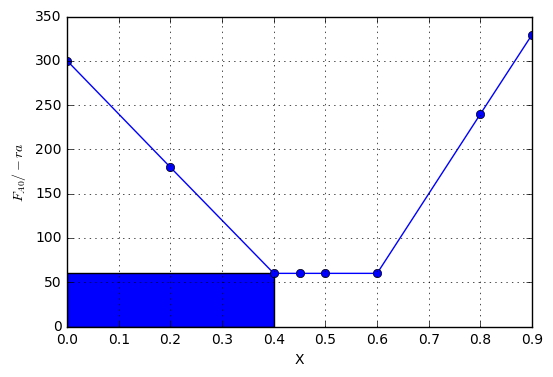

In [6]:
# This is the rectangle that defines the CSTR area
plt.plot(X, Fa0 / -ra, 'bo-')
plt.grid()
plt.xlabel('X')
plt.ylabel('$F_{A0}/-ra$')
plt.ylim([0, 350])

plt.fill_between([0, X[2]], [Fra[2], Fra[2]])


# Maximum conversion

What is the maximum conversion that can be obtained in a 105 L CSTR?

In [7]:
# print volumes at the known data points
print(Fra * X)

[   0.           35.92814371   24.           27.           30.           36.
  192.          296.7032967 ]


By inspection you can see that the answer has to be between X = 0.6 and 0.8. Let's build an interpolating function and compute it directly. In this block, I manually guessed the conversion until the volume was 105.

In [8]:
from scipy.interpolate import interp1d
f = interp1d(X, Fra)
print('The maximum conversion is {} in a volume of {:1.2f} L'.format(0.65, float(f(0.65))))

The maximum conversion is 0.65 in a volume of 105.00 L


An alternative approach is to use fsolve. The interpolating function is V = f(x) so we can solve an equation where 
$0 = 105 - f(x)$.

Here I use a "lambda" function which is just a one-line temporary function definition.

lambda x: 105 - f(x) is equivalent to 

```
def objective(x):
    return 105 - f(x)
```

In [9]:
from scipy.optimize import fsolve
ans, = fsolve(lambda x: 105 - f(x), 0.7)
print('The maximum conversion is {} in a volume of 105 L'.format(ans))

The maximum conversion is 0.65 in a volume of 105 L


Here is the longer way with formal function definitions.

In [10]:
def objective(x):
    return 105 - f(x)

guess = 0.7
ans, = fsolve(objective, guess)
print('The maximum conversion is {} in a volume of 105 L'.format(ans))

The maximum conversion is 0.65 in a volume of 105 L


There are many possible solutions to this problem that depend on what/if you interpolated on, and how you chose to do the integrals.